In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("DATA/cancer_classification.csv")

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

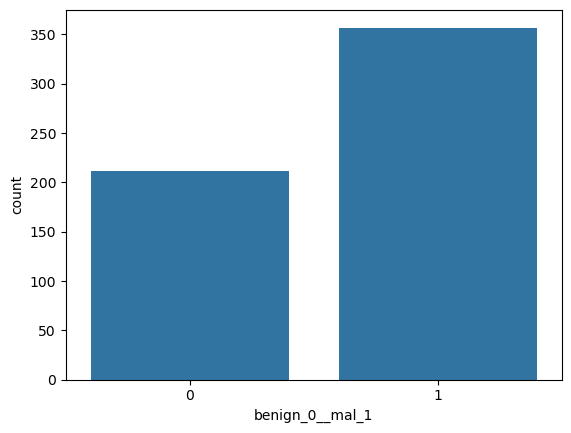

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

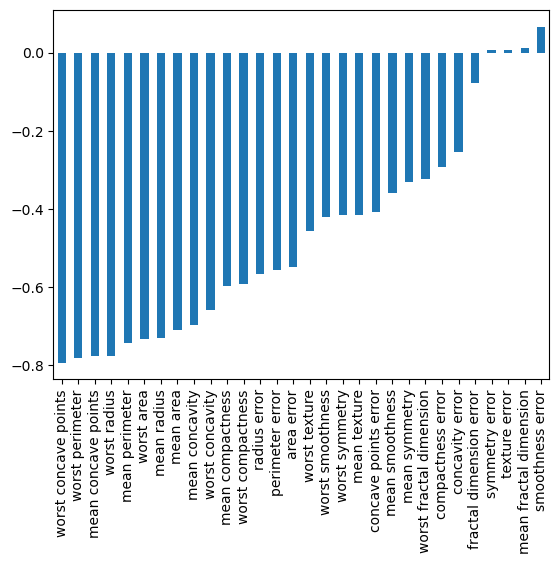

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

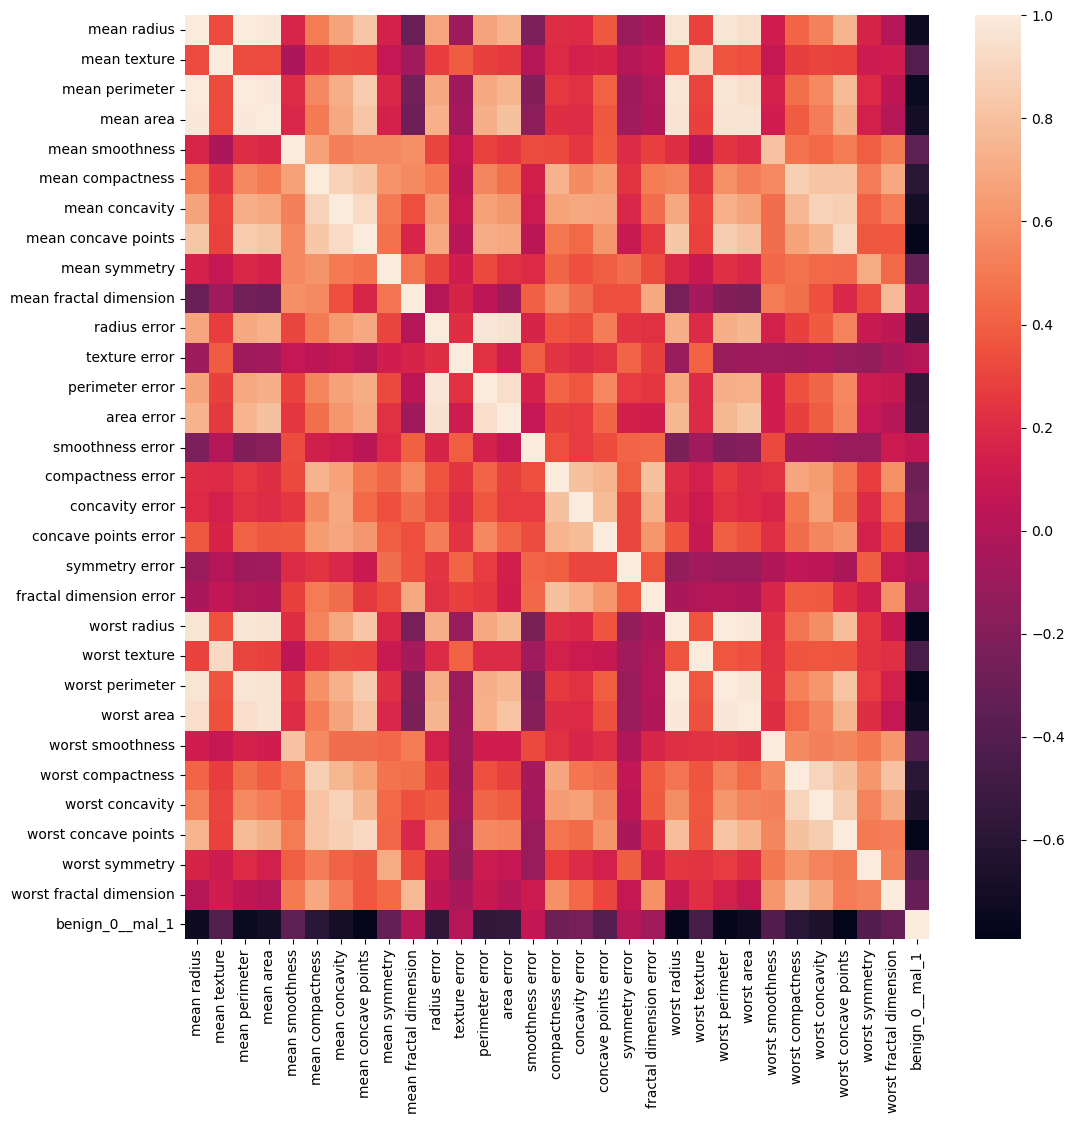

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [13]:
X = df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential

2024-02-23 15:37:46.672824: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
from tensorflow.keras.layers import Dense,Dropout

In [23]:
X_train.shape

(426, 30)

In [25]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [26]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 9ms/step - loss: 0.7040 - val_loss: 0.6884
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6670 - val_loss: 0.6506
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6289 - val_loss: 0.6103
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5877 - val_loss: 0.5645
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5425 - val_loss: 0.5093
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4851 - val_loss: 0.4482
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4294 - val_loss: 0.3937
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3801 - val_loss: 0.3474
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3367 - val_loss: 0.3067
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3010 - val_loss: 0.2736
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0491 - val_loss: 0.1140
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0484 - val_loss: 0.1206
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0489 - val_loss: 0.1155
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0489 - val_loss: 0.1168
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0489 - val_loss: 0.1124
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0495 - val_loss: 0.1214
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0608 - val_loss: 0.1163
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0555 - val_loss: 0.1232
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0484 - val_loss: 0.1277
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.1143
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0354 - val_loss: 0.1319
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0383 - val_loss: 0.1369
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0349 - val_loss: 0.1469
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0389 - val_loss: 0.1337
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0354 - val_loss: 0.1440
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0342 - val_loss: 0.1337
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0381 - val_loss: 0.1440
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0351 - val_loss: 0.1376
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0367 - val_loss: 0.1408
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0339 - val_loss: 0.1492
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0350 - val_loss: 0.1819
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0298 - val_loss: 0.1418
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.1566
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0259 - val_loss: 0.1493
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0254 - val_loss: 0.1544
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0266 - val_loss: 0.1562
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0255 - val_loss: 0.1552
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0254 - val_loss: 0.1518
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0251 - val_loss: 0.1470
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0270 - val_loss: 0.1703
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0201 - val_loss: 0.1562
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0194 - val_loss: 0.1683
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0197 - val_loss: 0.1568
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.1677
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.1598
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.1688
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.1692
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0211 - val_loss: 0.1545
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0203 - val_loss: 0.1704
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0205 - val_loss: 0.1551
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0138 - val_loss: 0.1690
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.1827
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.1773
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.1737
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.1804
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.1790
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.1907
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.1826
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.1776
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.1911
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0159 - val_loss: 0.2155
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.2002
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.1992
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.2414
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.1908
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.2059
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.2062
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.2085
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.1959
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.2435
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.2779
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.2627
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.2792
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.2654
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.2747
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.2716
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.2947
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.2650
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.2780
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.2664
Epoc

In [27]:
losses = pd.DataFrame(model.history.history)

<Axes: >

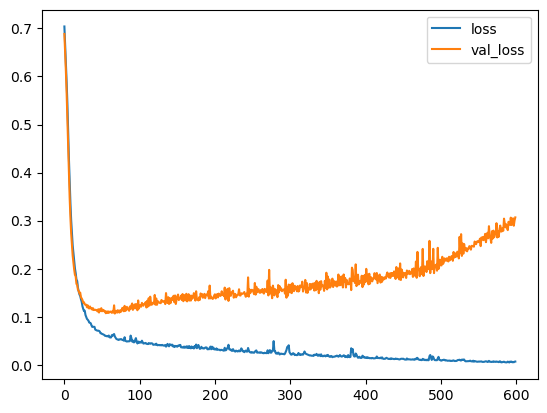

In [30]:
losses.plot() #example of over fitting

In [31]:
#recreating the model to use callbacks

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quanti

In [34]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [35]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6864 - val_loss: 0.6715
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6542 - val_loss: 0.6351
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6174 - val_loss: 0.5950
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5743 - val_loss: 0.5454
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5223 - val_loss: 0.4915
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4691 - val_loss: 0.4373
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4170 - val_loss: 0.3857
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3712 - val_loss: 0.3423
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3321 - val_loss: 0.3059
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2984 - val_loss: 0.2757
Epoch 11/

<Axes: >

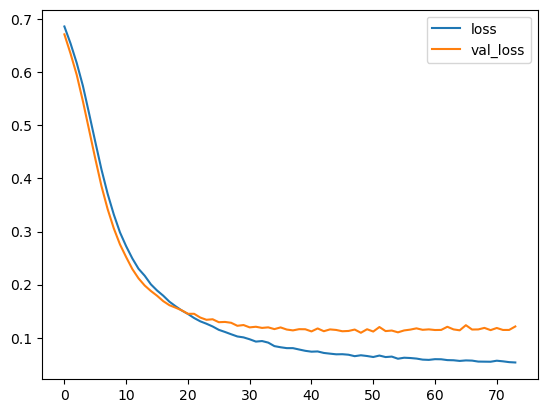

In [36]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [37]:
from tensorflow.keras.layers import Dropout

In [38]:
#recreating the model to use dropouts

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5)) #turns half the neurons off each time

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [39]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 8ms/step - loss: 0.7451 - val_loss: 0.6871
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6945 - val_loss: 0.6638
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6713 - val_loss: 0.6490
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6567 - val_loss: 0.6340
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6632 - val_loss: 0.6155
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6303 - val_loss: 0.5924
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6073 - val_loss: 0.5673
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5766 - val_loss: 0.5371
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5615 - val_loss: 0.5020
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5253 - val_loss: 0.4676
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1202 - val_loss: 0.0875
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1189 - val_loss: 0.0928
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1104 - val_loss: 0.0903
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1103 - val_loss: 0.0998
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1127 - val_loss: 0.0909
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1100 - val_loss: 0.0906
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1083 - val_loss: 0.0978
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0855 - val_loss: 0.0857
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1057 - val_loss: 0.0978
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1234 - val_loss: 0.0910
Epoch 93/600


<Axes: >

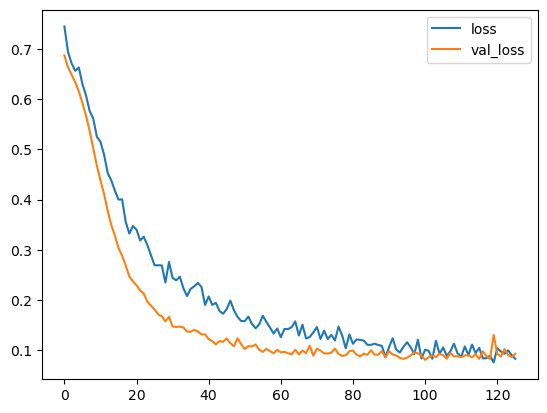

In [40]:
losses = pd.DataFrame(model.history.history)
losses.plot()


In [44]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 786us/step


In [45]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [48]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
